# Language Identification Hackathon: Kaggle Competition

© Explore Data Science Academy

---
### Honour Code

I Dakalo Mudimeli, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

### Introduction

South Africa stands as a vibrant tapestry of cultural diversity, characterized by its rich array of languages. The profound significance of language resonates throughout the nation, serving as a cornerstone for the enhancement of democracy and playing a pivotal role in shaping various facets of South African life, including the social, cultural, intellectual, economic, and political realms.

In this multilingual landscape, South Africa proudly boasts 11 official languages, each accorded equal status. The linguistic tapestry reflects the country's commitment to embracing its diverse heritage. Proficiency in multiple languages is not only common but celebrated, with a majority of South Africans possessing the ability to speak two or more official languages. This linguistic richness contributes to the nation's unique identity and underscores the interconnectedness of its people.

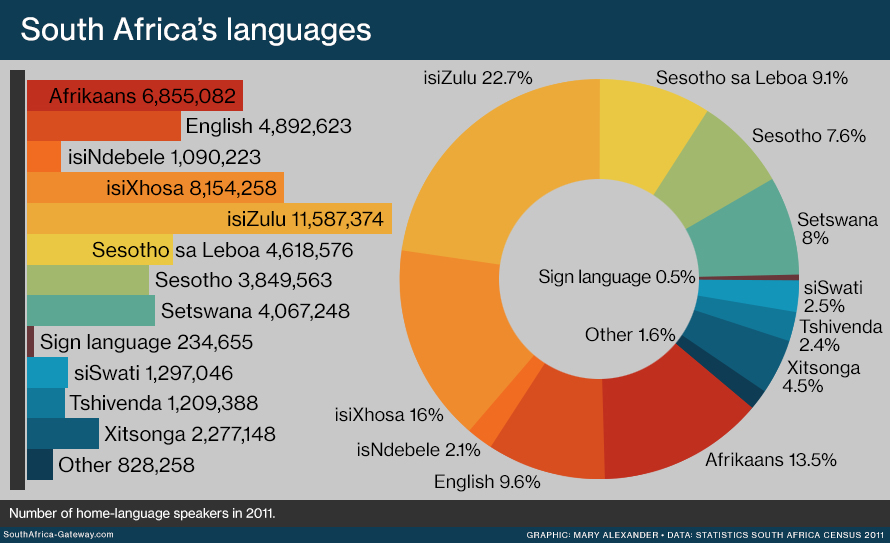

## Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

## Loading Data

In [2]:
# load the train data
train_df = pd.read_csv('train_set.csv')
# load the test data
test_df = pd.read_csv('test_set.csv')

## Exploratory Data Analysis (EDA)

In [3]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### The most frequent words from our train and test data 

In [4]:
from wordcloud import WordCloud

def generate_wordcloud(text_data):
    # Combine all text data into a single string
    combined_text = ' '.join(text_data)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

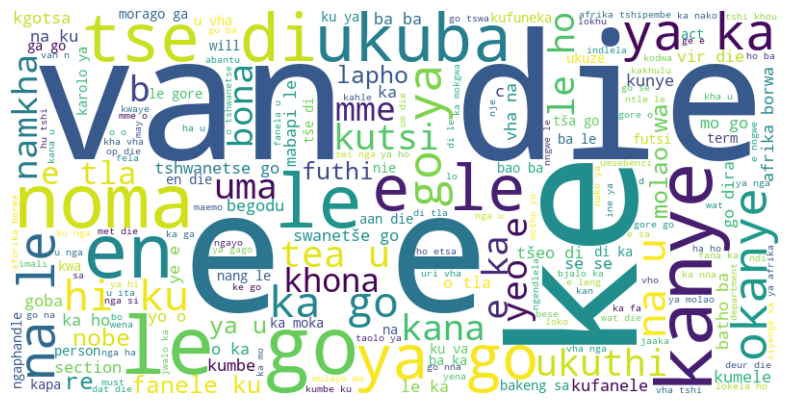

In [5]:
generate_wordcloud(train_df['text'])

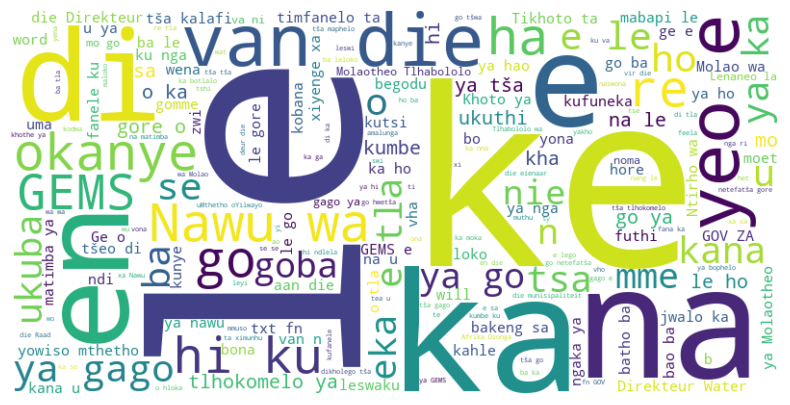

In [6]:
generate_wordcloud(test_df['text'])

## Data Preprocessing

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
def preprocess_data(train_df, test_df):
    # Initializing the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fitting the vectorizer on the training data
    vectorizer.fit(train_df['text'])

    # Transforming the training and test data using the fitted vectorizer
    train_features = vectorizer.transform(train_df['text'])
    test_features = vectorizer.transform(test_df['text'])

    return train_features, test_features, vectorizer



In [67]:
train_features, test_features, vectorizer = preprocess_data(train_df, test_df)


## 5. Modelling

Before we begin with the training of model we need to split our data into train and test, a good practice is to use 80% of data for training and then we can use the remaining 20% for validation.

In [68]:
# Spliting data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_df['lang_id'], test_size=0.2, random_state=42)

Now we are going to train different model listed below and make our predictions from which we will assess the f1-score which will shw the best performing model:

1. Logistic Regression
2. K Nearest Neighbors (KNN)
3. Support Vector Machine
4. Naive Bayes

### Logistic Regression
We will train a logistic regression model in this section

In [69]:
lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    fit_intercept=True,
    class_weight=None,
    solver='lbfgs',
    max_iter=1000,
    multi_class='auto',
    verbose=0,
    random_state=42,
    tol=1e-4,
    n_jobs=None
)

In [70]:
# Train the Logistic Regression model on the training set
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [71]:
# Calculate the F1 score for the Logistic Regression model
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

print("Logistic Regression F1 Score:", lr_f1)

Logistic Regression F1 Score: 0.994245605433102


### K Nearest Neighbors (KNN)

In [72]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)


In [73]:
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [74]:
knn_f1 = f1_score(y_test, knn_preds, average='weighted')
print("KNN F1 Score:", knn_f1)

KNN F1 Score: 0.9593450685034197


### Support Vector Machine

In [75]:
svc_model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=1e-3,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=42
)

In [76]:
svc_model.fit(X_train, y_train)
svm_predictions = svc_model.predict(X_test)

In [77]:
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
print("SVM F1 Score:", svm_f1)

SVM F1 Score: 0.9942650475719715


### Naive Bayes

In [78]:
nb_model = MultinomialNB(
    alpha=1.0,
    fit_prior=True,
    class_prior=None
)

In [79]:
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [80]:
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
print("Naive Bayes F1 Score:", nb_f1)

Naive Bayes F1 Score: 0.9980299054262277


## Predicting with best model

In [81]:
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

In [82]:
predicts = nb_model.predict(X_test)

## Saving csv file

In [83]:
pred_df = pd.DataFrame()
pred_df['text'] = test_df['text']
pred_df['lang_id'] = predicts

In [84]:
pred_df.head(20)

,text,lang_id
0,"Mmasepala, fa maemo a a kgethegileng a letlele...",tsn
1,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,nbl
2,Tshivhumbeo tshi fana na ngano dza vhathu.,ven
3,Kube inja nelikati betingevakala kutsi titsini...,ssw
4,Winste op buitelandse valuta.,afr
5,"Ke feela dilense tše hlakilego, tša pono e tee...",nso
6,<fn>(762010101403 AM) 1495 Final Gems Birthing...,eng
7,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,sot
8,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,zul
9,"So, on occasion, are statistics misused.",eng


In [85]:
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': predicts})

submission_df.to_csv('Submission.csv', index=False)